In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


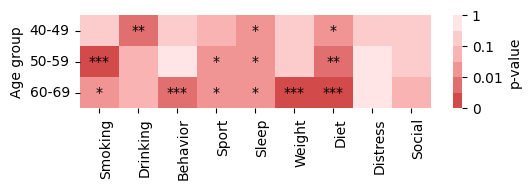

In [ ]:
# Read CSV file
df = pd.read_csv('../data/Age_group-LifeStyle-p-value.csv')
df.set_index(df.columns[0], inplace=True)

# Define custom color gradient
colors = ["#D34A4A", "#F7A7A7", "#FFE5E5"]
cmap = LinearSegmentedColormap.from_list("custom_pink", colors, N=256)

# Define p-value thresholds for color mapping
boundaries = np.array([0, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0])

# Create normalization object for colormap
norm = BoundaryNorm(boundaries, cmap.N)

# Initialize figure with specific dimensions
plt.figure(figsize=(5.5, 2))

# Create heatmap with custom settings
heatmap = sns.heatmap(
    df,
    annot=False,
    cmap=cmap,
    norm=norm,
    linewidths=0,
    cbar_kws={
        'label': 'p-value',
        'ticks': [0, 0.01, 0.1, 1.0],
        'format': lambda x, _: f"{x:.3f}".rstrip('0').rstrip('.') if '.' in f"{x:.3f}" else f"{x}",
        'aspect': 10,
    }
)

# Remove minor ticks from colorbar if present
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(which='minor', size=0)

# Add significance stars based on p-value thresholds
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        p_value = df.iloc[i, j]
        if p_value <= 0.001:
            text = "***"
        elif p_value <= 0.01:
            text = "**"
        elif p_value <= 0.05:
            text = "*"
        else:
            text = ""
        
        # Add text marker if significant
        if text:
            bg_color = heatmap.collections[0].get_facecolor()[i * df.shape[1] + j]
            brightness = (bg_color[0] * 299 + bg_color[1] * 587 + bg_color[2] * 114) / 1000
            text_color = 'white' if brightness < 0.1 else 'black'

            # Add text marker at cell center
            plt.text(j + 0.5, i + 0.5, text, 
                     ha='center', va='center', 
                     color=text_color, fontsize=10)

# Rotate x-axis labels 90 degrees and align properly
plt.xticks(rotation=90, ha='right', rotation_mode='anchor')

# Keep y-axis labels horizontal and right-aligned
plt.yticks(rotation=0, ha='right')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Display the plot
plt.show()